## Abdul Musa Yusuf -- CE263N/CP257

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 

In [2]:
# To begin I will be reading in the data. 

df = pd.read_csv (r'ce263n_cyplan257_nodes.csv')

In [3]:
df.head()

,Node ID,Name,Email Address,Majors
0,1,"Adelkar, Siddharth",Siddharth Adelkar,Info Mgmt & Systems MIMS
1,2,"Aldamer, Abdullah",Abdullah Aldamer,Civil & Environmental Eng MEng
2,3,"Almusafri, Sara",Sara Almusafri,Development Engineering MDE
3,4,"Alshehri, Ibtihal",Ibtihal Alshehri,Development Engineering MDE
4,5,"Bolaji, John",John Bolaji,"Business Admin MBA-MEng CDP, Civ Env Engin MEn..."


In [4]:
# I will then import the random links document

rd = pd.read_csv (r'random.csv')

In [5]:
rd.head()

,source,target
0,58,20
1,58,32
2,58,41
3,58,76
4,22,30


In [6]:
# Lastly I will then import the acquintances document. 

ac = pd.read_csv (r'acquaintances.csv', delimiter = ',')
ac.columns = list(map(str.lower, ac.columns))

In [7]:
ac.head()

,source,target,weight
0,21,60,3
1,21,2,1
2,21,19,3
3,21,76,3
4,21,52,1


### Part 1: How many nodes and links each network has

In [8]:
# For the random links I will go ahead and dedcuced that below..

gr = nx.DiGraph()

In [9]:
for i in rd.index.values:
    gr.add_edge(rd['source'][i],rd['target'][i])

In [10]:
print(gr)

DiGraph with 77 nodes and 251 edges


Answer: From the above, we can deduce that there are 77 nodes in our network and 251 links. 

In [11]:
ac.source.nunique()
gh = nx.DiGraph()

In [12]:
# For the acquaintances links I will go ahead and dedcuced that below..

for i in ac.index.values:
        gh.add_edge(ac['source'][i], ac['target'][i])

In [13]:
print(gh)

DiGraph with 71 nodes and 290 edges


Answer: For the acquaintances network, we can deduce that there are 71 nodes in our network as well as a total of 290 links. 

### Part 2: What is the average degree of each network

In [14]:
# I will first of all begin with the random link network.

rdg = 2 * np.mean(list(dict(gr.in_degree()).values()))

In [15]:
print(round(rdg, 2))

6.52


Answer: The average degree network for the random link is: 6.52

In [16]:
# I will then go ahead and calculate the average degree for the acquaintances network..

acdg = 2 * np.mean(list(dict(gh.in_degree()).values()))

In [17]:
print(round(acdg, 2))

8.17


Answer: The average degree network for the acquaintances network is: 8.17

## Part 3: What is the maximum in-degree in each network and the node id/s of the student/s that corresponds to it

In [18]:
# starting with random link network.
mrd = max(dict(gr.in_degree()), key = dict(gr.in_degree()).get)

In [19]:
print(mrd)

12


In [20]:
print(gr.in_degree()[12])

9


- Answer: We can deduce that 9 is the node of the student that corresponds to the maximum in-degree of this network.

- Maximum in degree is 12. 

In [21]:
# The acquaintances network..

acrd = max(dict(gh.in_degree()), key = dict(gh.in_degree()).get)

In [22]:
print(acrd)

19


In [23]:
print(gh.in_degree()[19])

12


- Answer: I can deduce here that the node of the student that corresponds to the maximum in-degree is 12. 

- Maximum in degree is 19.

## Part 4: In the same Figure, plot the histogram of the in-degree of the two  empirical networks 

<Figure size 864x576 with 0 Axes>

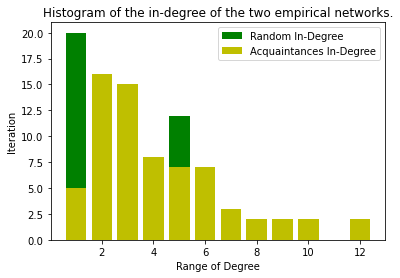

In [24]:
rdid = list(dict(gr.in_degree()).values())
acid = list(dict(gh.in_degree()).values())

brd = range(1,max(rdid)+2)
bac = range(1,max(acid)+2)

crd,krd = np.histogram(rdid, bins = brd)
cac,kac = np.histogram(acid, bins = bac)

plt.figure(figsize = (12, 8))
fig, ax = plt.subplots()
plt.bar(krd[:-1],crd,label='Random In-Degree',color = 'g')
plt.bar(kac[:-1],cac,label='Acquaintances In-Degree',color='y', alpha = 1)
plt.title('Histogram of the in-degree of the two empirical networks.')
plt.ylabel('Iteration')
plt.xlabel('Range of Degree')
plt.legend(loc = 'upper right')
plt.show()